In [30]:
#!pip install wordcloud

In [121]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math
# For removal of stopwords and lemmatization
import spacy
# For creating a Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

In [109]:
# Importing
traindata=pd.read_csv('train.csv')

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [116]:
traindata = traindata.filter(["Text","Summary"])
traindata.head()

,Text,Summary
0,LONDON England Reuters Harry Potter star Danie...,Harry Potter star Daniel Radcliffe gets £20M f...
1,Editors note In our Behind the Scenes series C...,Mentally ill inmates in Miami are housed on th...
2,MINNEAPOLIS Minnesota CNN Drivers who were on ...,"NEW: ""I thought I was going to die,"" driver sa..."
3,WASHINGTON CNN Doctors removed five small poly...,"Five small polyps found during procedure; ""non..."
4,CNN The National Football League has indefinit...,"NEW: NFL chief, Atlanta Falcons owner critical..."


In [117]:
train_se = traindata.sample(n = 10000, random_state = 77)
train_se = train_se.reset_index(drop=True)

In [118]:
train_se.head(4)

,Text,Summary
0,I like all of the Food Should Taste Good varie...,Delicious
1,By Tim Shipman PUBLISHED 02 47 EST 21 May 2012...,Cameron green light to new generation of nucle...
2,I can tell you from experience this is the bes...,Its a bit pricey but 100% worth it!
3,This was the first time we bought this brand O...,Solid classic blend of fine herbes


In [122]:
train_se.isnull().sum()

Text        0
Summary    14
dtype: int64

In [123]:
train_se.dropna(inplace=True)
train_se.isnull().sum()

Text       0
Summary    0
dtype: int64

Expand Contractions

In [124]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

In [125]:
# Expanding Contractions in the reviews
train_se['Text']=train_se['Text'].apply(lambda x:expand_contractions(x))
train_se['Summary']=train_se['Summary'].apply(lambda x:expand_contractions(x))

Lowercase the reviews

In [126]:
train_se['Text']=train_se['Text'].apply(lambda x: x.lower())
train_se['Summary']=train_se['Summary'].apply(lambda x: x.lower())

Remove digits and words containing digits

In [127]:
train_se['Text']=train_se['Text'].apply(lambda x: re.sub('\w*\d\w*','', x))
train_se['Summary']=train_se['Summary'].apply(lambda x: re.sub('\w*\d\w*','', x))

Remove Punctuations

In [128]:
train_se['Text']=train_se['Text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
train_se['Summary']=train_se['Summary'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [129]:
# Removing extra spaces
train_se['Text']=train_se['Text'].apply(lambda x: re.sub(' +',' ',x))
train_se['Summary']=train_se['Summary'].apply(lambda x: re.sub(' +',' ',x))

Preparing Text Data for Exploratory Data Analysis (EDA)

In [130]:
# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
train_se['Text_lemmatized']=train_se['Text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
train_se['Summary_lemmatized']=train_se['Summary'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

Exploratory Data Analysis

In [131]:
train_se.head(4)

,Text,Summary,Text_lemmatized,Summary_lemmatized
0,i like all of the food should taste good varie...,delicious,like food taste good variety try multigrain ja...,delicious
1,by tim shipman published est may updated est m...,cameron green light to new generation of nucle...,tim shipman publish est update est david camer...,cameron green light new generation nuclear sub...
2,i can tell you from experience this is the bes...,its a bit pricey but worth it,tell experience good protein meal replacement ...,bit pricey worth
3,this was the first time we bought this brand o...,solid classic blend of fine herbes,time buy brand usual expensive brand come croc...,solid classic blend fine herbe


In [132]:
list_Text_lemmatized = train_se['Text_lemmatized'].to_list()
list_Summary_lemmatized = train_se['Summary_lemmatized'].to_list()

In [133]:
Text_lemmatized_onestring = ' '.join(list_Text_lemmatized)
Summary_lemmatized_onestring = ' '.join(list_Summary_lemmatized)

In [146]:
# Create and Generate a Word Cloud Image
wordcloud = WordCloud(width=700, 
                      height=700,
                      prefer_horizontal=0.5,
                      background_color="white", 
                      mode="RGBA")
#wordcloud = WordCloud(width=800,height=400,colormap="Dark2")

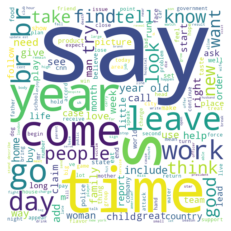

In [153]:
wordcloud_text = wordcloud.generate(Text_lemmatized_onestring)
#Display the generated image
plt.imshow(wordcloud_text, interpolation="bilinear")
plt.axis('off')
plt.show()
# save
wordcloud_text.to_file("text_wc.png")

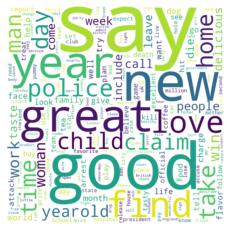

In [154]:
wordcloud_summary = wordcloud.generate(Summary_lemmatized_onestring)
#Display the generated image
plt.imshow(wordcloud_summary, interpolation="bilinear")
plt.axis('off')
plt.show()

# save
wordcloud_summary.to_file("summary_wc.png")